In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df_raw = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv", sep = ",")
df_raw.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [2]:
df_raw = df_raw.drop_duplicates().reset_index(drop = True)
df_raw.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [3]:
from sklearn.preprocessing import StandardScaler

data_types = df_raw.dtypes
numeric_columns = [c for c in list(data_types[data_types != "object"].index) if c != "Heart disease_number"]

scaler = StandardScaler()
norm_features = scaler.fit_transform(df_raw[numeric_columns])

# Create a new DataFrame with the scaled numerical variables
total_data_scal = pd.DataFrame(norm_features, index = df_raw.index, columns = numeric_columns)
total_data_scal["Heart disease_number"] = df_raw["Heart disease_number"]
total_data_scal.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,Heart disease_number
0,-1.940874,-0.145679,-0.142421,0.158006,-0.135556,0.573496,-0.153144,0.027610,-0.139384,0.588469,...,-0.063696,-0.071720,-0.089834,-0.129902,-0.609615,-0.582796,-0.669652,-0.147523,-1.082865,3345
1,-1.940742,0.341296,0.287476,-0.242861,0.320383,-0.193107,0.183774,-0.469965,0.230620,-0.110300,...,-0.394103,-0.414900,-0.337677,0.376251,-0.433549,-0.393279,-0.343373,0.389791,-0.420704,13414
2,-1.940610,-0.237785,-0.239429,-0.419441,-0.246181,-0.439718,-0.225971,0.272104,-0.218759,0.656538,...,2.432709,2.483064,2.317776,-0.183415,1.855312,1.880929,1.777443,-0.204321,0.903618,2159
3,-1.940478,-0.245223,-0.246032,-0.426966,-0.254791,-0.609076,-0.230792,0.396168,-0.220555,1.264959,...,0.376846,0.423984,0.299632,-0.229096,-0.257483,-0.203761,-0.180233,-0.242100,-1.745026,1533
4,-1.940346,-0.138966,-0.135053,0.186249,-0.137140,0.216679,-0.155888,-0.200808,-0.143570,0.088582,...,0.156575,0.195197,0.158008,-0.111247,-0.081417,-0.014244,-0.017093,-0.124105,-1.745026,4101


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

X = total_data_scal.drop(columns=["Heart disease_number"])
y = total_data_scal["Heart disease_number"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
train_indices = list(X_train.index)
test_indices = list(X_test.index)

k = int(len(X_train.columns) * 0.3)
selection_model = SelectKBest(score_func = f_regression, k = k)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number
0,-0.232556,-0.227731,-0.234284,-0.232951,-0.226353,-0.231316,-0.229599,-0.233425,-0.234680,-0.234420,...,-0.212643,-0.208590,-0.231195,-0.229737,-0.233171,-0.234370,-0.232975,-0.223516,-0.218609,-0.219329
1,-0.158676,-0.178665,-0.180166,-0.188266,-0.175070,-0.161168,-0.134688,-0.105618,-0.119270,-0.091822,...,-0.116680,-0.110850,-0.150293,-0.098866,-0.152859,-0.142645,-0.155304,-0.110080,-0.131449,-0.130962
2,-0.199114,-0.211128,-0.195138,-0.166782,-0.195036,-0.194045,-0.199725,-0.219256,-0.222207,-0.205154,...,-0.192263,-0.217668,-0.197005,-0.216056,-0.195125,-0.193205,-0.201976,-0.193106,-0.189197,-0.206391
3,-0.036595,-0.037734,-0.017077,-0.057986,-0.052252,-0.033158,-0.020228,-0.032603,-0.023876,-0.046224,...,0.062458,-0.107888,-0.036940,-0.030034,-0.039882,-0.003321,0.006163,-0.007077,-0.047515,-0.045054
4,0.090839,0.094680,0.101662,0.056721,0.042392,0.068095,0.101699,0.144664,0.140685,0.166099,...,0.274818,0.194913,0.097767,0.161314,0.088485,0.165555,0.182740,0.265603,0.123040,0.132454


In [6]:
X_train_sel["Heart disease_number"] = list(y_train)
X_test_sel["Heart disease_number"] = list(y_test)

X_train_sel.to_csv("data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("data/processed/clean_test.csv", index = False)

In [7]:
total_data = pd.concat([X_train_sel, X_test_sel])
total_data.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number,Heart disease_number
0,-0.232556,-0.227731,-0.234284,-0.232951,-0.226353,-0.231316,-0.229599,-0.233425,-0.234680,-0.234420,...,-0.208590,-0.231195,-0.229737,-0.233171,-0.234370,-0.232975,-0.223516,-0.218609,-0.219329,2072
1,-0.158676,-0.178665,-0.180166,-0.188266,-0.175070,-0.161168,-0.134688,-0.105618,-0.119270,-0.091822,...,-0.110850,-0.150293,-0.098866,-0.152859,-0.142645,-0.155304,-0.110080,-0.131449,-0.130962,3796
2,-0.199114,-0.211128,-0.195138,-0.166782,-0.195036,-0.194045,-0.199725,-0.219256,-0.222207,-0.205154,...,-0.217668,-0.197005,-0.216056,-0.195125,-0.193205,-0.201976,-0.193106,-0.189197,-0.206391,2222
3,-0.036595,-0.037734,-0.017077,-0.057986,-0.052252,-0.033158,-0.020228,-0.032603,-0.023876,-0.046224,...,-0.107888,-0.036940,-0.030034,-0.039882,-0.003321,0.006163,-0.007077,-0.047515,-0.045054,5484
4,0.090839,0.094680,0.101662,0.056721,0.042392,0.068095,0.101699,0.144664,0.140685,0.166099,...,0.194913,0.097767,0.161314,0.088485,0.165555,0.182740,0.265603,0.123040,0.132454,8686


In [8]:
X_test_sel.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number,Heart disease_number
0,-0.285286,-0.285362,-0.294836,-0.269566,-0.258568,-0.268541,-0.289649,-0.312989,-0.316763,-0.286734,...,-0.285225,-0.284324,-0.308211,-0.283698,-0.302439,-0.302292,-0.324038,-0.276290,-0.281172,698
1,0.496553,0.433072,0.392170,0.544659,0.453677,0.391480,0.499744,0.668639,0.716353,0.476084,...,0.424904,0.477184,0.620724,0.517408,0.527360,0.516364,0.443806,0.418504,0.454092,13982
2,-0.260191,-0.255123,-0.265837,-0.246628,-0.234723,-0.240703,-0.264552,-0.289867,-0.289846,-0.290962,...,-0.261868,-0.257294,-0.287868,-0.259943,-0.249299,-0.259877,-0.225107,-0.225970,-0.242229,1768
3,0.039389,0.058341,0.059701,-0.018647,0.003236,0.030594,0.074401,0.091003,0.060721,0.005012,...,0.130719,0.036299,0.055281,0.031494,0.035274,0.026108,0.136643,0.003409,0.022352,6739
4,0.364272,0.281232,0.323623,0.525353,0.295990,0.288317,0.298029,0.461297,0.497760,0.351393,...,0.305024,0.336581,0.423969,0.390596,0.271127,0.273318,0.329669,0.256620,0.334804,11305


In [10]:
train_data = pd.read_csv("data/processed/clean_train.csv")
test_data = pd.read_csv("data/processed/clean_test.csv")

train_data.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number,Heart disease_number
0,-0.232556,-0.227731,-0.234284,-0.232951,-0.226353,-0.231316,-0.229599,-0.233425,-0.234680,-0.234420,...,-0.208590,-0.231195,-0.229737,-0.233171,-0.234370,-0.232975,-0.223516,-0.218609,-0.219329,2072
1,-0.158676,-0.178665,-0.180166,-0.188266,-0.175070,-0.161168,-0.134688,-0.105618,-0.119270,-0.091822,...,-0.110850,-0.150293,-0.098866,-0.152859,-0.142645,-0.155304,-0.110080,-0.131449,-0.130962,3796
2,-0.199114,-0.211128,-0.195138,-0.166782,-0.195036,-0.194045,-0.199725,-0.219256,-0.222207,-0.205154,...,-0.217668,-0.197005,-0.216056,-0.195125,-0.193205,-0.201976,-0.193106,-0.189197,-0.206391,2222
3,-0.036595,-0.037734,-0.017077,-0.057986,-0.052252,-0.033158,-0.020228,-0.032603,-0.023876,-0.046224,...,-0.107888,-0.036940,-0.030034,-0.039882,-0.003321,0.006163,-0.007077,-0.047515,-0.045054,5484
4,0.090839,0.094680,0.101662,0.056721,0.042392,0.068095,0.101699,0.144664,0.140685,0.166099,...,0.194913,0.097767,0.161314,0.088485,0.165555,0.182740,0.265603,0.123040,0.132454,8686


In [11]:
X_train = train_data.drop(["Heart disease_number"], axis = 1)
y_train = train_data["Heart disease_number"]
X_test = test_data.drop(["Heart disease_number"], axis = 1)
y_test = test_data["Heart disease_number"]

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercep (a): 5596.6501198409915
Coefficients: [ 7.96933922e+15 -8.88176014e+14 -8.98311567e+14 -1.05325492e+15
 -1.04078920e+15 -9.23545762e+14 -9.07579219e+14 -7.33330665e+14
 -4.30998144e+14 -2.56289250e+14  1.83933148e+03 -8.82520476e+14
  1.61184559e+03  1.38649946e+02  1.90977052e+03  1.64818790e+03
  4.17783119e+02  4.97250000e+02 -1.26062500e+03 -5.41187500e+02
  2.59312500e+02 -7.28000000e+02 -5.58812500e+02 -1.82281250e+04
  8.39256250e+03  4.35048125e+04 -7.24375000e+02  2.25150000e+03
  5.20593750e+03  2.27806250e+03  3.01400000e+03]


In [15]:
y_pred = model.predict(X_test)
y_pred

array([7.07627021e+02, 1.31599077e+04, 1.68978558e+03, 6.90521340e+03,
       1.12459290e+04, 1.40035213e+03, 7.58058610e+02, 1.31897895e+03,
       3.93047791e+02, 6.88250406e+02, 1.29502383e+03, 2.29415459e+02,
       4.33820450e+03, 1.41511273e+03, 9.21353416e+03, 2.47697035e+03,
       5.40847021e+04, 1.22810628e+03, 1.93165488e+03, 4.40415856e+02,
       1.52279296e+03, 6.92178363e+02, 8.49789867e+02, 5.92773174e+02,
       9.79973072e+04, 2.43248602e+03, 8.85793897e+02, 2.13218017e+03,
       8.63689983e+02, 1.87479462e+02, 1.16580008e+03, 1.82497293e+03,
       2.62956861e+03, 3.20737858e+03, 8.75266410e+03, 1.53985609e+03,
       2.62638802e+03, 1.24183651e+03, 8.65429882e+02, 1.78954664e+03,
       1.36945680e+03, 9.06197737e+03, 3.82890801e+02, 1.51078526e+02,
       2.61355043e+03, 7.19811053e+02, 3.45135316e+02, 7.71838524e+03,
       1.08205987e+03, 7.62360777e+02, 1.82815272e+04, 3.23166196e+02,
       1.43923917e+03, 5.54410263e+02, 8.49610132e+03, 7.56858141e+02,
      

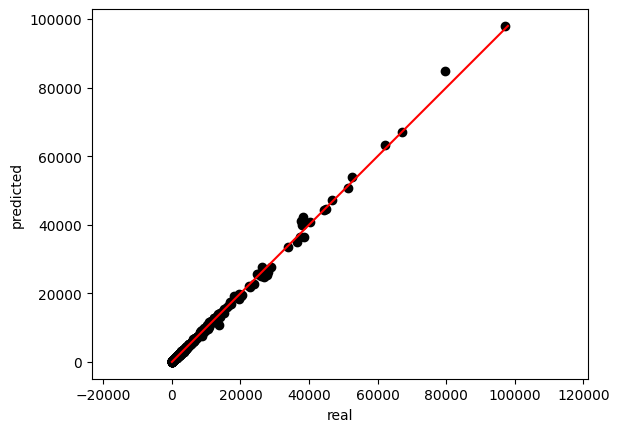

In [29]:
# Graph prediction
plt.scatter(x= y_test, y= y_pred, c= 'k')
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], c='r')
plt.axis('equal')
plt.xlabel('real')
plt.ylabel('predicted')
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 193829.99052070826
R2 Score: 0.9977854449104832


In [25]:
from sklearn.linear_model import Lasso

alpha = 5
lasso_model = Lasso(alpha = alpha)

# Training the model
lasso_model.fit(X_train, y_train)

# We evaluate the performance of the model on the test data
score = lasso_model.score(X_test, y_test)
print("Coefficients:", lasso_model.coef_)
print("R2 score:", score)

Coefficients: [   -0.           228.47499565    -0.            -0.
     0.          1949.71789351   108.29066608     0.
  3949.06942554  1512.95045038   766.02202764  -834.01858123
     0.          -975.50283395   -42.21963416  1193.76037487
    -0.            -0.         -1697.89165586     0.
   434.29705586  -263.75251101  -604.1978551  -2048.31640903
    -0.            -0.           833.36572756  2824.89070682
  6210.79832905  1975.95078059   212.64446094]
R2 score: 0.9980414373392766


/workspaces/tareas/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.292e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(


In [26]:
from pickle import dump

dump(lasso_model, open("models/lasso_alpha-1.0.sav", "wb"))